# Data analysis across scientific papers related to the Darwin's naturalization hypothesis

## Darwin's naturalization hypothesis: The invasion success of non-native species is higher in areas that are poor in closely related species than in areas that are rich in closely related species.

## 1. Import the required libraries

In [1]:
import requests
import datetime
import pandas as pd
import numpy as np
from orkg import ORKG
from bokeh.io import export_png
from bokeh.models import ColumnDataSource,LabelSet, HoverTool, WheelZoomTool, ResetTool, SaveTool, PanTool, DatetimeTickFormatter, Whisker
from bokeh.plotting import figure, show, output_notebook
from bokeh.transform import cumsum
from bokeh.palettes import Category10



import matplotlib.pyplot as plt

from math import pi

import os
import re
output_notebook()

Loading BokehJS ...

## 2. Connect to ORKG and import Darwin's naturalization hypothesis comparison table

In [2]:
orkg = ORKG(host='https://orkg.org/orkg', simcomp_host='https://orkg.org/orkg/simcomp')

df = orkg.contributions.compare_dataframe(comparison_id='R53407')
df = df.T
df=df.rename(columns={'stand of hypothesis':'stand'})
#df

# 3. Preprocess the data

In [3]:
# put the titles of the papers in a column named "study"
df['study']=df.iloc[:, 0]
df = df.reset_index()
df

,index,Research Method,Continent,Measure of invasion success,hypothesis,stand,type of experiment,Measure of species relationship,Habitat,WOS search or Cited references,Investigated species,Number of species,has research problem,Study date,same as,study
0,Plant invasions in Taiwan: Insights from the f...,Observational or correlational,Asia,Invasion Status from Database: Naturalized,Darwin's naturalisation,Supported,Field,Number of species in the same genus,Terrestrial,Cited references,Plants,327,Testing the Darwin's naturalisation hypothesis...,2004,https://sws.geonames.org/6255147//https://www....,Observational or correlational
1,The Roles of Climate- Phylogenetic Relatedness...,Observational or correlational,North America,Invasion Status from Database/ Expert judgemen...,Darwin's naturalisation,Supported,Field,PNND,Terrestrial/Freshwater/Marine,Cited references,Amphibians and Reptiles,139,Testing the Darwin's naturalisation hypothesis...,2012,https://sws.geonames.org/6255149//https://www....,Observational or correlational
2,The Roles of Climate- Phylogenetic Relatedness...,Observational or correlational,North America,Invasion Status from Database/ Expert judgemen...,Darwin's naturalisation,Supported,Field,MPD,Terrestrial/Freshwater/Marine,Cited references,Amphibians and Reptiles,139,Testing the Darwin's naturalisation hypothesis...,2012,https://sws.geonames.org/6255149//https://www....,Observational or correlational
3,Establishment success of introduced amphibians...,Observational or correlational,All continents except Antarctica,Invasion Status from Database: Established,Darwin's naturalisation,Questioned,Field,Number of species in the same genus,Terrestrial/Freshwater,WOS search,Amphibians,162,Testing the Darwin's naturalisation hypothesis...,2011,,Observational or correlational
4,Associations between a highly invasive species...,Observational or correlational,South America,Abundance/Biomass/Cover/Growth of exotic species,Darwin's naturalisation,Questioned,Field,Number of species in the same family,Freshwater,WOS search,Plants,1,Testing the Darwin's naturalisation hypothesis...,2011,https://sws.geonames.org/6255150//https://www....,Observational or correlational
5,Fish species introductions provide novel insig...,Observational or correlational,North America,Expert judgement: Invasive,Darwin's naturalisation,Undecided,Field,MPD,Freshwater,WOS search,Fishes,85,Testing the Darwin's naturalisation hypothesis...,2014,https://sws.geonames.org/6255149//https://www....,Observational or correlational
6,Exotic taxa less related to native species are...,Observational or correlational,North America,Invasion Status from Database: Invasive,Darwin's naturalisation,Supported,Field,PNND,Terrestrial,Cited references,Plants,207,Testing the Darwin's naturalisation hypothesis...,2006,https://sws.geonames.org/6255149//https://www....,Observational or correlational
7,Exotic taxa less related to native species are...,Observational or correlational,North America,Invasion Status from Database: Invasive,Darwin's naturalisation,Supported,Field,MPD,Terrestrial,Cited references,Plants,207,Testing the Darwin's naturalisation hypothesis...,2006,https://sws.geonames.org/6255149//https://www....,Observational or correlational
8,Testing Darwin's naturalization hypothesis in ...,Observational or correlational,Europe,Invasion Status from Database: Invasive,Darwin's naturalisation,Supported,Field,PNND,Terrestrial,WOS search,Plants,645,Testing the Darwin's naturalisation hypothesis...,2011,https://sws.geonames.org/6255148//https://www....,Observational or correlational
9,Testing Darwin's naturalization hypothesis in ...,Observational or correlational,Europe,Invasion Status from Database: Invasive,Darwin's naturalisation,Questioned,Field,MPD,Terrestrial,WOS search,Plants,645,Testing the Darwin's naturalisation hypothesis...,2011,https://sws.geonames.org/6255148//https://www....,Observational or correlational


## The main hypothesis is divided into 4 sub hypotheses according to the measure of species relationship.

## 4.  Analytical questions

## Question 1: How many research contributions have discussed this hypothesis? How many contributions support, are undecided, or question the hypothesis?

### The main hypothesis

In [4]:
df_stand = df.value_counts(['stand']).reset_index(name='count')
df_stand

,stand,count
0,Questioned,29
1,Supported,22
2,Undecided,4


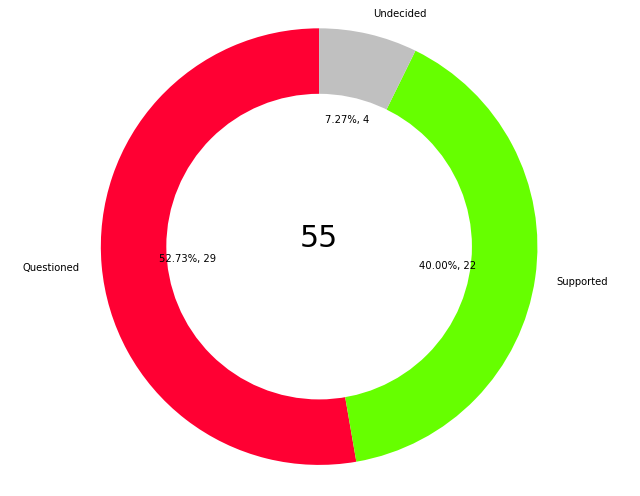

In [5]:
# With matplotlib
labels = np.array(df_stand["stand"]).astype(str)
sizes = np.array(df_stand["count"]).astype(int) 
colors = ['#FF0033','#66FF00','#C0C0C0']




fig1, ax1 = plt.subplots(figsize=(9, 7))
#patches, texts, autotexts = 
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"55", ha='center',fontsize=30)
#plt.title("Darwin's naturalization Hypothesis",fontsize=20)
#autotexts[0].set_fontsize(15)
#texts[0].set_fontsize(15)
#texts[2].set_fontsize(15)

plt.rcParams.update({'font.size': 15})

plt.savefig("img/main_hyp.png")


plt.show()

## Question 2: How many contributions have discussed each sub hypotheses? How many contributions support, are undecided, or question each sub hypothesis?

### The first sub hypothesis considers PNND as the measure of species relationship. PNND: Phylogenetic neared neighbor distance: the phylogenetic distance from each introduced species to ist nearest native neighbor.

In [6]:
df_PNND = df[df['Measure of species relationship']=='PNND']
df_PNND_grouped = df_PNND.value_counts(['stand']).reset_index(name='count')
df_PNND_grouped 

,stand,count
0,Supported,10
1,Questioned,5


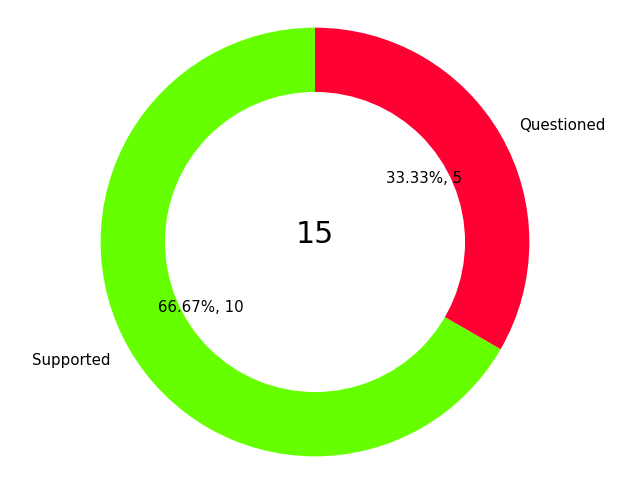

In [7]:
labels = np.array(df_PNND_grouped["stand"]).astype(str)
sizes = np.array(df_PNND_grouped["count"]).astype(int) 
colors = ['#66FF00','#FF0033','#C0C0C0']


fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0, "15", ha='center',fontsize=30)
#plt.title("PNND",fontsize=20)
plt.rcParams.update({'font.size': 15})

plt.savefig("img/hyp1.png")


plt.show()

### The second sub hypothesis considers MPD as the measure of species relationship. MPD: Mean phylogenetic distance: the mean phylogenetic distance between each introduced species and all species of the native community.

In [8]:
df_MPD = df[df['Measure of species relationship']=='MPD']
df_MPD_grouped = df_MPD.value_counts(['stand']).reset_index(name='count')
df_MPD_grouped 

,stand,count
0,Questioned,8
1,Supported,6
2,Undecided,1


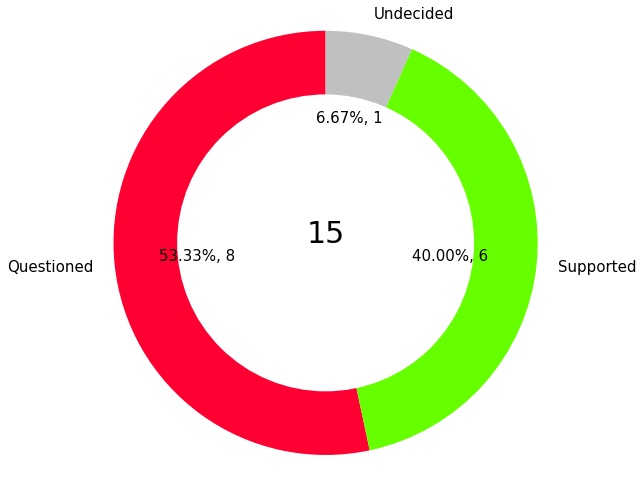

In [9]:
labels = np.array(df_MPD_grouped["stand"]).astype(str)
sizes = np.array(df_MPD_grouped["count"]).astype(int) 
colors = ['#FF0033','#66FF00','#C0C0C0']


fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"15", ha='center',fontsize=30)
#plt.title("MPD",fontsize=20)
plt.rcParams.update({'font.size': 15})

plt.savefig("img/hyp2.png")


plt.show()

### The third sub hypothesis considers the number of species in the same genus as the measure of species relationship.

In [10]:
df_GENUS = df[df['Measure of species relationship']=='Number of species in the same genus']
df_GENUS_grouped = df_GENUS.value_counts(['stand']).reset_index(name='count')
df_GENUS_grouped 

,stand,count
0,Questioned,12
1,Supported,6
2,Undecided,2


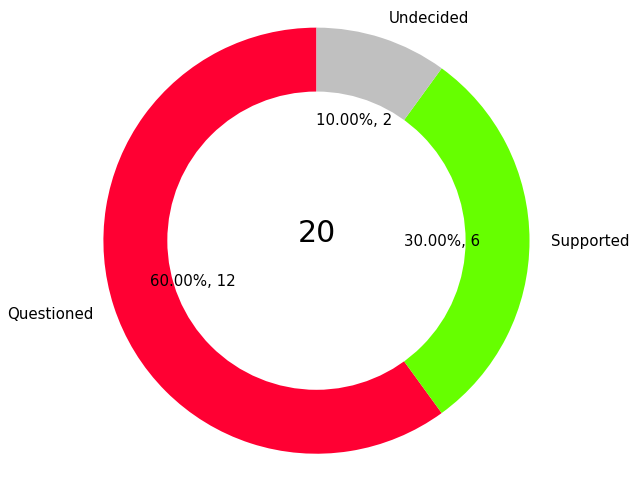

In [11]:
labels = np.array(df_GENUS_grouped["stand"]).astype(str)
sizes = np.array(df_GENUS_grouped["count"]).astype(int) 
colors = ['#FF0033','#66FF00','#C0C0C0']


fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0,"20", ha='center',fontsize=30)
#plt.title("Genus",fontsize=20)
plt.rcParams.update({'font.size': 15})

plt.savefig("img/hyp3.png")


plt.show()

### The fourth sub hypothesis considers the number of species in the same family as the measure of species relationship.

In [12]:
df_family = df[df['Measure of species relationship']=='Number of species in the same family']
df_family_grouped = df_family.value_counts(['stand']).reset_index(name='count')
df_family_grouped

,stand,count
0,Questioned,4
1,Undecided,1


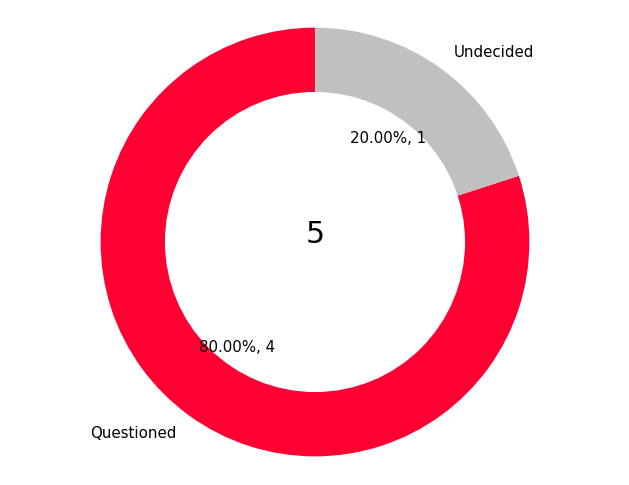

In [13]:
labels = np.array(df_family_grouped["stand"]).astype(str)
sizes = np.array(df_family_grouped["count"]).astype(int) 
colors = ['#FF0033','#C0C0C0']


fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, colors = colors, labels=labels, autopct=lambda p:f'{p:.2f}%, {p*sum(sizes)/100 :.0f} ', startangle=90)
# Create a circle for the center of the plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.text(0, 0, "5", ha='center',fontsize=30)
#plt.title("Family",fontsize=20)
plt.rcParams.update({'font.size': 15})


plt.savefig("img/hyp4.png")


plt.show()

## The hierarchy of the hypothesis: Create a graph visualization of the main and sub hypotheses and save it in a pdf file.

In [14]:
from graphviz import Digraph
g = Digraph('G', filename='img/darwin_naturalization.gv')
g.edge('A', 'B')
g.edge('A', 'C')
g.edge('A', 'D')
g.edge('A', 'E')
g.node('A', shape='none',label="", image="main_hyp.PNG")
g.node('B', shape='none',label="", image="hyp1.PNG")
g.node('C', shape='none',label="", image="hyp2.PNG")
g.node('D', shape='none',label="", image="hyp3.PNG")
g.node('E', shape='none',label="", image="hyp4.PNG")
g.view()

'img\\darwin_naturalization.gv.pdf'

## Show the graph visualizaion here in the notebook

In [15]:
class PDF(object):
  def __init__(self, pdf, size=(500,500)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

PDF('img/darwin_naturalization.gv.pdf',size=(1100,1100))

## To test the hypothesis, some articles investigated plant taxa while others investigated non-plant taxa such as birds, reptiles, etc

## First we look at the studies that investigated plant taxa

## Question 3: How many plant taxa did each article investigate?

In [16]:
df_plants = df[df['Investigated species']=='Plants']
#df_plants

In [17]:
# Puplication year
#df['Study date'] = pd.to_datetime(df['Study date'].astype(str), format='%Y')
dates = np.array(df_plants['Study date'])
dates

array(['2004', '2011', '2006', '2006', '2011', '2011', '2010', '2010',
       '1996', '2013', '2013', '2012', '2012', '2013', '2013', '1996',
       '2001', '2006', '2008', '2012', '2011', '2011', '2009', '2009',
       '2012', '2011', '2011', '2002', '2013', '2013', '2011', '2009',
       '2001', '2008', '2013', '2013', '2013', '2013', '2014', '2001'],
      dtype=object)

In [18]:
df['Number of species'] = pd.to_numeric(df['Number of species'])
plants = np.array(df_plants['Number of species'])
plants

array(['327', '1', '207', '207', '645', '645', '186', '186', '112', '282',
       '282', '362', '362', '202', '202', '1000', '2747', '862', '285',
       '1', '14', '14', '84', '84', '14', '236', '169', '24774', '9', '9',
       '3', '12927', '13', '847', '51', '51', '83', '83', '1', '2754'],
      dtype=object)

In [19]:
studies = np.array(df_plants['index'])

In [20]:
stand_of = np.array(df_plants['stand'])

In [21]:
df9 = pd.DataFrame(data=dict( stud=studies,dates=dates,value=plants,stand=stand_of))

hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Stand of hypothesis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
         '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df9)
p = figure(x_range= studies,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of plant taxa',
     #     title="Number of plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'


show(p)

In [22]:
export_png(p, filename='img/plant.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\darwin_naturalization\\img\\plant.png'

## Now we look at the non-plant taxa

## Question 4: How many non-plant taxa did each article investigate?

In [23]:
df_other = df[df['Investigated species']!='Plants']
#df_other

In [24]:
#df_other['Study date'] = pd.to_datetime(df_other['Study date'].astype(str), format='%Y')
dates_other = np.array(df_other['Study date']).astype(str)
dates_other

array(['2012', '2012', '2011', '2014', '2006', '2004', '2012', '2012',
       '2012', '2014', '2012', '2010', '2010', '2012', '2013'],
      dtype='<U4')

In [25]:
species_other = np.array(df_other['Investigated species'])
stand_of_other = np.array(df_other['stand'])

In [26]:
number_other = np.array(df_other['Number of species'])
studies_other = np.array(df_other['index'])
#palette = ['#FA8072','#006666','#60d4cb','#ee4d2e','#efd566','#00ffbf','#8000ff','#996666','#ffb3b3','#330000','#867979','#ff00bf','#80ff00','#ff8000','#efbaca']

In [27]:
df10 = pd.DataFrame(data=dict(stud=studies_other,dates=dates_other,value=number_other,species=species_other,stand=stand_of_other))
df10

,stud,dates,value,species,stand
0,The Roles of Climate- Phylogenetic Relatedness...,2012,139,Amphibians and Reptiles,Supported
1,The Roles of Climate- Phylogenetic Relatedness...,2012,139,Amphibians and Reptiles,Supported
2,Establishment success of introduced amphibians...,2011,162,Amphibians,Questioned
3,Fish species introductions provide novel insig...,2014,85,Fishes,Undecided
4,Does Darwin's naturalization hypothesis explai...,2006,388,Fishes,Questioned
5,Distinctiveness magnifies the impact of biolog...,2004,739,Fishes,Supported
6,Introduction pathway and climate trump ecology...,2012,184,Amphibians,Supported
7,Patterns of bird invasion are consistent with ...,2012,1385,Birds,Questioned
8,Patterns of bird invasion are consistent with ...,2012,1385,Birds,Questioned
9,Congener diversity- topographic heterogeneity ...,2014,107,Amphibians and Reptiles,Questioned


In [28]:
hover1 = HoverTool(
    tooltips=[
        ('Article', '@stud'),
        ('Number of taxa', '@value'),
        ('Article date', '@dates'),
        ('Investigated taxon', '@species'),
        ('Stand of hypothsis', '@stand')
    ],
        formatters={
        '@dates': 'printf',
        '@{value}' : 'printf',
        '@{stud}' : 'printf',
        '@{species}' : 'printf',
        '@{stand}' : 'printf'
    }
)

source = ColumnDataSource(df10)
p = figure(x_range= studies_other,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Article',
           y_axis_label='Number of non-plant taxa',
     #     title="Number of non-plant species in each study"
          )

p.vbar(x='stud',top='value', width=0.9, color='#718dbf',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'
p.xaxis.major_label_text_font_size = '0pt' # disable ticks labels

p.yaxis.major_label_text_font_size = '11pt'
p.yaxis.major_label_text_font_style = 'bold'

p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'



show(p)

In [29]:
export_png(p, filename='img/non_plant.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\darwin_naturalization\\img\\non_plant.png'

## Question 5: The literature tests the hypotheses by examining plant and non-plant taxa. What exactly are these non-plant taxa? How many articles investigated each taxon?

In [30]:
Plants = df['Investigated species'].str.count("Plants").sum()
Amphibians = df['Investigated species'].str.count("Amphibians").sum()
Reptiles = df['Investigated species'].str.count("Reptiles").sum()
Birds = df['Investigated species'].str.count("Birds").sum()
Fishes = df['Investigated species'].str.count("Fishes").sum()
Mammals = df['Investigated species'].str.count("Mammals").sum()
Molluscs = df['Investigated species'].str.count("Molluscs").sum()
Eubacteria_Archaea_viruses = df['Investigated species'].str.count("Eubacteria-Archaea-viruses").sum()

data = {'Investigated species':['Plants','Amphibians', 'Reptiles', 'Birds', 'Fishes','Mammals','Molluscs','Eubacteria-Archaea-viruses'], 
        'count':[Plants,Amphibians, Reptiles, Birds, Fishes, Mammals,Molluscs,Eubacteria_Archaea_viruses]} 
df_species = pd.DataFrame(data)
df_species

,Investigated species,count
0,Plants,40
1,Amphibians,6
2,Reptiles,5
3,Birds,3
4,Fishes,4
5,Mammals,1
6,Molluscs,1
7,Eubacteria-Archaea-viruses,2


In [31]:
spec = np.array(df_species['Investigated species'])
count_spec = np.array(df_species['count'])
palette = ['#996666','#ffb3b3','#330000','#867979','#ff00bf','#80ff00','#ff8000','#00ffbf']

In [32]:
df11 = pd.DataFrame(data=dict(species=spec,counts=count_spec,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Investigated taxon', '@species'),
        ('Number of articles', '@counts')
    ],
        formatters={
        '@species': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df11)
p = figure(x_range= spec,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Investigated taxon',
           y_axis_label='Number of articles',
 #         title="Number of studies for each investigated species"
          )

p.vbar(x='species',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
#p.title.text_font_size = '15pt'

p.xaxis.major_label_orientation = pi/12


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'





show(p)

In [33]:
export_png(p, filename='img/investigated_taxa.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\darwin_naturalization\\img\\investigated_taxa.png'

## Question 6: When were the relevant articles published? In other words, what are the most productive years in terms of publishing articles related to this hypothesis?

In [34]:
df_study_date = df.value_counts(['Study date']).reset_index(name='count')
df_study_date

,Study date,count
0,2013,11
1,2012,11
2,2011,9
3,2010,4
4,2006,4
5,2014,3
6,2009,3
7,2001,3
8,2008,2
9,2004,2


In [35]:
study_date = np.array(df_study_date['Study date'])
count_dates = np.array(df_study_date['count'])
palette = ['#996666','#ffb3b3','#330000','#867979','#ff00bf','#80ff00','#ff8000','#00ffbf','#FFEFD5','#006400','#808000','#00FFFF']

In [36]:
df20 = pd.DataFrame(data=dict(dates=study_date,counts=count_dates,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Article date', '@dates'),
        ('Number of articles', '@counts')
    ],
        formatters={
        '@dates': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df20)
p = figure(x_range= study_date,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Puplication year',
           y_axis_label='Number of articles',
    #      title="Number of studies in each year"
          )

p.vbar(x='dates',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.xaxis.major_label_orientation = pi/6


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'



show(p)

In [37]:
export_png(p, filename='img/years.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\darwin_naturalization\\img\\years.png'

## Question 7: Where did the studies related to this hypothesis take place?

In [38]:
No_Am = df['Continent'].str.count("North America").sum()
Eur = df['Continent'].str.count("Europe").sum()
Oce = df['Continent'].str.count("Oceania").sum()
Afr = df['Continent'].str.count("Africa").sum()
Asi= df['Continent'].str.count("Asia").sum()
So_Am = df['Continent'].str.count("South America").sum()
All_exc = df['Continent'].str.count("All continents except Antarctica").sum()


data = {'Continent':['North America', 'Europe', 'Oceania', 'Africa','Asia','South America','All except Antarctica'], 
        'count':[No_Am, Eur, Oce, Afr, Asi, So_Am, All_exc]} 
dff = pd.DataFrame(data)
dff

,Continent,count
0,North America,26
1,Europe,12
2,Oceania,8
3,Africa,2
4,Asia,2
5,South America,4
6,All except Antarctica,6


In [39]:
cont = np.array(dff['Continent'])
count = np.array(dff['count'])
palette = ['#996666','#ffb3b3','#330000','#867979','#ff00bf','#80ff00','#ff8000']

In [40]:
df10 = pd.DataFrame(data=dict( continents=cont,counts=count,color=palette))

hover1 = HoverTool(
    tooltips=[
        ('Continent', '@continents'),
        ('Number of studies', '@counts')
    ],
        formatters={
        '@continents': 'printf',
        '@{counts}' : 'printf'
        }
)

source = ColumnDataSource(df10)
p = figure(x_range= cont,
     plot_height=500, plot_width=970, toolbar_location=None, 
            tools=[hover1,WheelZoomTool(), PanTool(), ResetTool(), SaveTool()],
           x_axis_label='Continent',
           y_axis_label='Number of articles',
      #    title="Number of studies in each continent"
          )

p.vbar(x='continents',top='counts', width=0.9,color='color',source=source)
#p.xaxis.major_label_orientation = "vertical"
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
p.title.text_font_size = '15pt'


p.xaxis.major_label_orientation = pi/12


# ticks labels font size
p.yaxis.major_label_text_font_size = '11pt'
p.xaxis.major_label_text_font_size = '14pt'

# ticks labels font style
p.yaxis.major_label_text_font_style = 'bold'
p.xaxis.major_label_text_font_style = 'bold'

# axis label font style
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_style = 'bold'
show(p)




In [41]:
export_png(p, filename='img/continents.png')

'C:\\Users\\User\\2-Masterarbeit\\Final_Upload\\invasion_biology\\hypotheses_notebooks\\darwin_naturalization\\img\\continents.png'